In [3]:
# importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [28]:
# reading the file
Startups50 = pd.read_csv("50_Startups.csv")
Startups50

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [39]:
# renaming the columns into simpler terms
Startups = pd.DataFrame(columns=['RD','Adm','MS','State','Profit'])
Startups["RD"] = pd.Series(Startups50["R&D Spend"]) 
Startups["Adm"] = pd.Series(Startups50["Administration"]) 
Startups["MS"] = pd.Series(Startups50["Marketing Spend"])
Startups["State"]=pd.Series(Startups50["State"])
Startups["Profit"]=pd.Series(Startups50["Profit"])
Startups

,RD,Adm,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [40]:
Startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RD      50 non-null     float64
 1   Adm     50 non-null     float64
 2   MS      50 non-null     float64
 3   State   50 non-null     object 
 4   Profit  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [41]:
# checking for missing values
Startups.isna().sum()

RD        0
Adm       0
MS        0
State     0
Profit    0
dtype: int64

In [42]:
# Correlation Matrix
Startups.corr()

,RD,Adm,MS,Profit
RD,1.000000,0.241955,0.724248,0.972900
Adm,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [ ]:
# Scatterplot between variables along with histograms

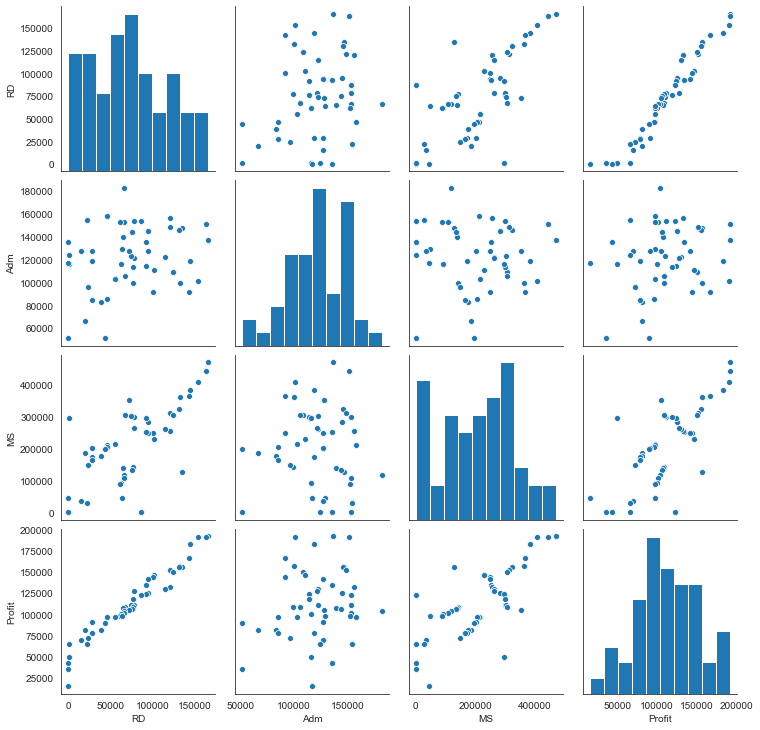

In [43]:
sns.set_style(style='white')
sns.pairplot(Startups)

In [44]:
# build a model
import statsmodels.formula.api as smf 
model = smf.ols('Profit~RD+Adm+MS',data=Startups).fit()

In [46]:
# from the summary it is clear that Adm and MS are the insignificant variables
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 17 Jan 2021   Prob (F-statistic):           4.53e-30
Time:                        16:33:06   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD             0.8057      0.045     17.846      0.000       0.715       0.897
Adm           -0.0268      0.051     -0.526      0.602      -0.130       0.076
MS             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
# devoloping linear models,the summary shows that Adm is insignificant 
ml_Adm=smf.ols('Profit~Adm',data = Startups).fit()
ml_Adm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Sun, 17 Jan 2021   Prob (F-statistic):              0.162
Time:                        18:54:37   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Adm            0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
ml_MS=smf.ols('Profit~MS',data = Startups).fit()
ml_MS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Sun, 17 Jan 2021   Prob (F-statistic):           4.38e-10
Time:                        18:57:47   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
MS             0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
ml_AdMS=smf.ols('Profit~Adm+MS',data = Startups).fit()
ml_AdMS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Sun, 17 Jan 2021   Prob (F-statistic):           2.50e-10
Time:                        18:58:43   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
Adm            0.3237      0.131      2.468      0.017       0.060       0.588
MS             0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
#calculating VIF, the VIF values shows that Adm is strongly correlated
rsq_Adm = smf.ols('Adm~MS+RD',data=Startups).fit().rsquared  
vif_Adm = 1/(1-rsq_Adm) 

rsq_MS = smf.ols('MS~Adm+RD',data=Startups).fit().rsquared  
vif_MS = 1/(1-rsq_MS) 

rsq_RD= smf.ols('RD~Adm+MS',data=Startups).fit().rsquared  
vif_RD = 1/(1-rsq_RD) #



# Storing vif values in a data frame
d1 = {'Variables':['Adm','MS','RD'],'VIF':[vif_Adm,vif_MS,vif_RD]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Adm,1.175091
1,MS,2.326773
2,RD,2.468903


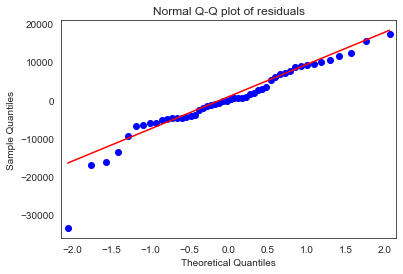

In [52]:
#test for normality of residuals
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [53]:

list(np.where(model.resid>10000)) 

[array([10, 12, 16, 36, 38, 45], dtype=int64)]

In [54]:
#residual plot for homoscedasticity
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

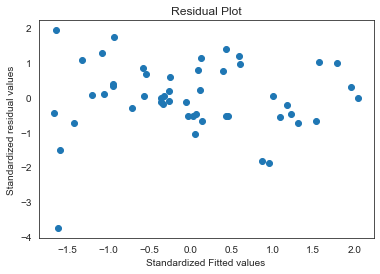

In [55]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

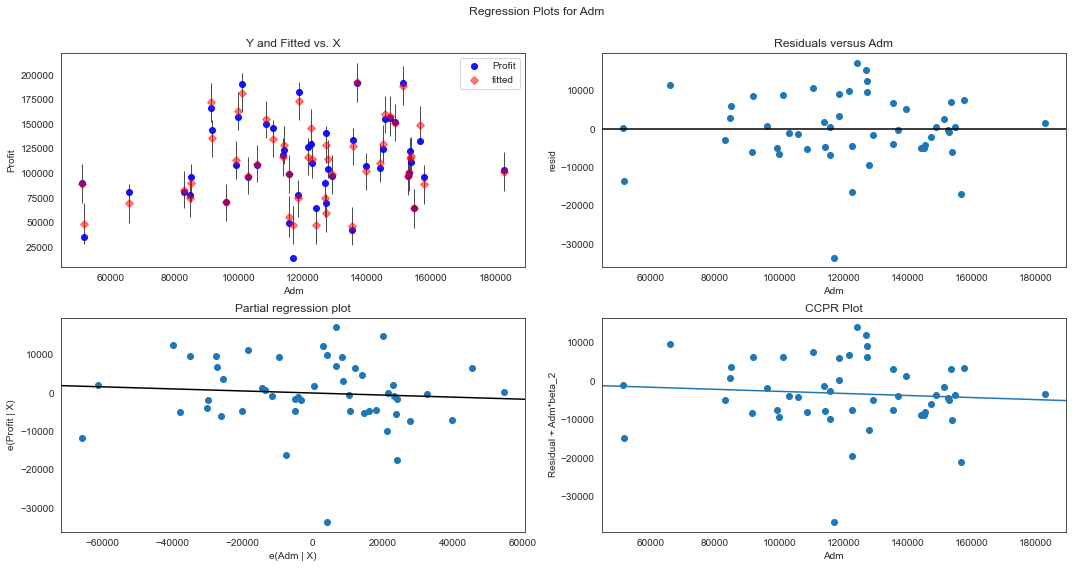

In [56]:
# residual vs regressors
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Adm", fig=fig)
plt.show()

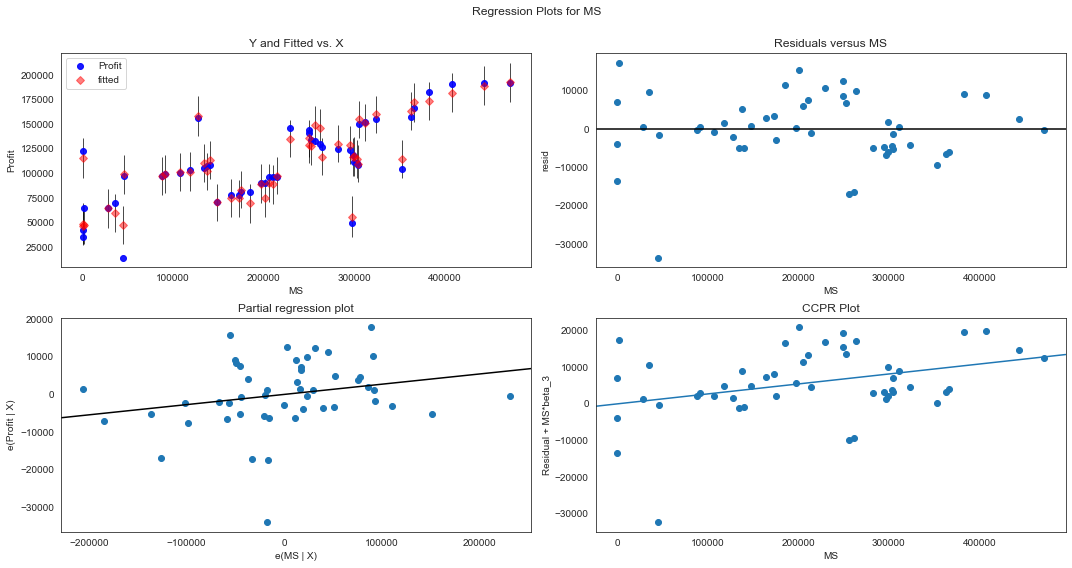

In [57]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MS", fig=fig)
plt.show()

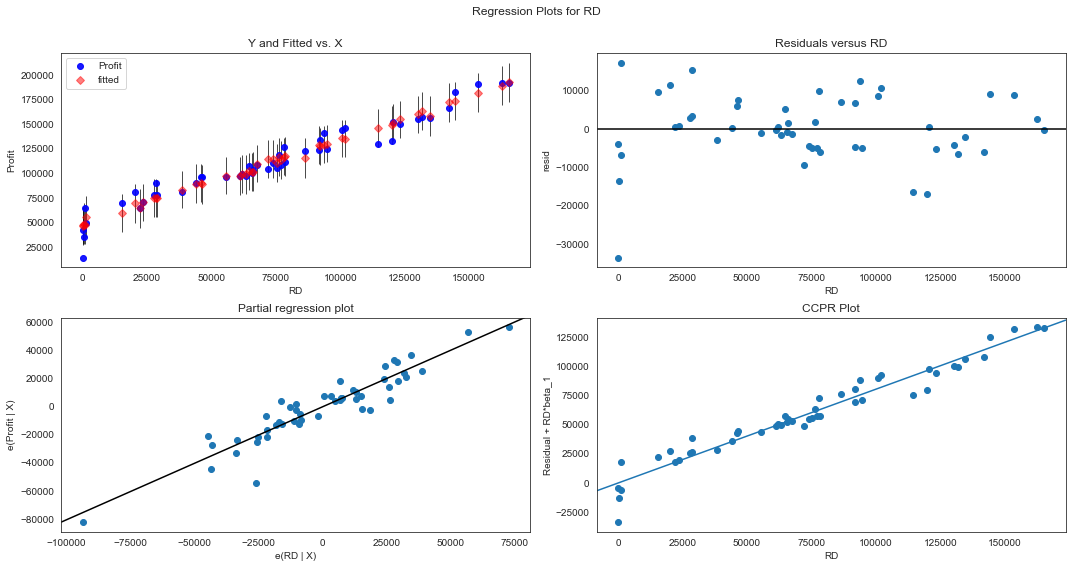

In [58]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RD", fig=fig)
plt.show()

In [ ]:
# Model Deletion Daignostics
# Detecting Influencers



In [59]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

<ipython-input-60-78b58d18c8f8>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(Startups)), np.round(c, 3))


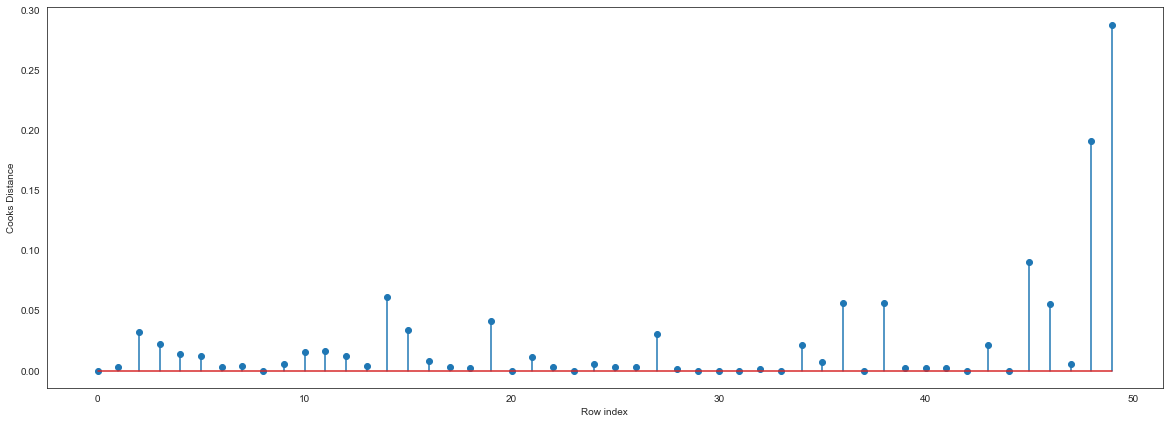

In [60]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(Startups)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [61]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.28808229275432623)

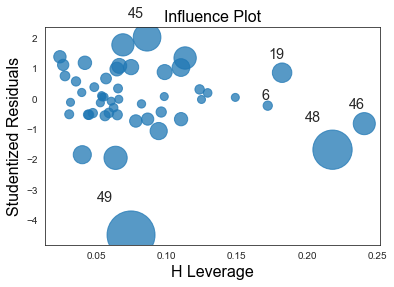

In [62]:
#highly infuencing points
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [63]:
# from the infuence plot it clear that there are no influencer
k = Startups.shape[1]
n = Startups.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

In [ ]:
# from the influence plot and cooks distance it is clear that there are influential points

In [73]:
#Exclude variable "Adm" and generate R-Squared and AIC values as Adm is less significant
final_ml_MS= smf.ols('Profit~RD+MS',data = Startups).fit()

In [70]:
(final_ml_MS.rsquared,final_ml_MS.aic)

(0.9504503015559763, 1057.070772191826)

In [ ]:
# muulticollinearity problem is resolved

In [78]:
pred = final_ml_MS.predict(Startups)
pred

0     192800.458625
1     189774.659480
2     181405.378097
3     173441.308842
4     171127.623218
5     162879.310812
6     158028.130454
7     160455.738877
8     152317.803673
9     154343.813935
10    135011.914724
11    134638.870075
12    129218.396579
13    127812.205465
14    150192.491797
15    146032.715433
16    117025.891848
17    130829.444732
18    128882.198828
19    115816.418333
20    116650.892092
21    118384.170709
22    114990.384639
23    109886.185217
24    112552.187151
25    102612.909242
26    110990.792884
27    114978.605150
28    103125.012760
29    102440.424090
30     99085.219562
31     98314.548854
32     98864.662254
33     97600.730445
34     90262.641219
35     89776.494285
36     75824.233912
37     87974.014518
38     68631.318323
39     82924.815275
40     75049.056031
41     74113.888705
42     70234.250574
43     60390.232852
44     65489.729308
45     47829.573980
46     56909.800859
47     46975.864221
48     47407.652602
49     48326.894462
